# B3S2 Correlación y ANOVA

In [1]:
#Basado en: https://www.cienciadedatos.net/documentos/pystats05-correlacion-lineal-python.html

In [2]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
from scipy import stats
from scipy.stats import pearsonr

# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [3]:
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/' +
       'Estadistica-machine-learning-python/master/data/Howell1.csv')
datos = pd.read_csv(url)

# Se utilizan únicamente información de individuos mayores de 18 años.
datos = datos[datos.age > 18]

datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  346 non-null    float64
 1   weight  346 non-null    float64
 2   age     346 non-null    float64
 3   male    346 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 13.5 KB


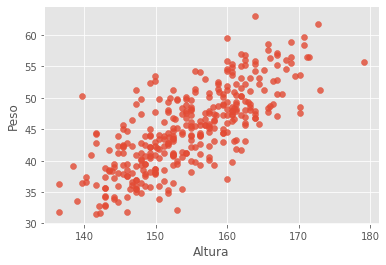

In [4]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=datos.height, y=datos.weight, alpha= 0.8)
ax.set_xlabel('Altura')
ax.set_ylabel('Peso');

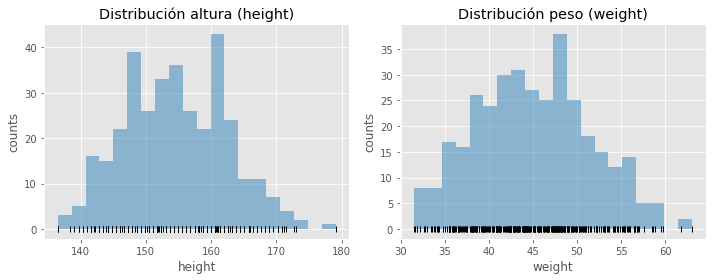

In [5]:
# Gráfico distribución variables
# ==============================================================================
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].hist(x=datos.height, bins=20, color="#3182bd", alpha=0.5)
axs[0].plot(datos.height, np.full_like(datos.height, -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Distribución altura (height)')
axs[0].set_xlabel('height')
axs[0].set_ylabel('counts')

axs[1].hist(x=datos.weight, bins=20, color="#3182bd", alpha=0.5)
axs[1].plot(datos.weight, np.full_like(datos.weight, -0.01), '|k', markeredgewidth=1)
axs[1].set_title('Distribución peso (weight)')
axs[1].set_xlabel('weight')
axs[1].set_ylabel('counts')


plt.tight_layout();

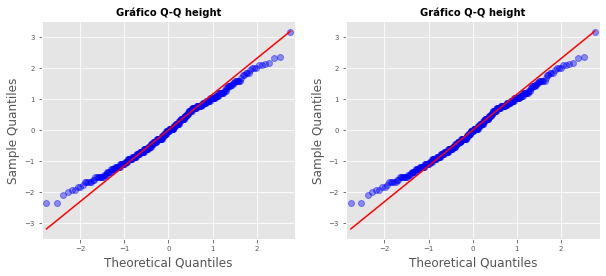

In [6]:
# Gráfico Q-Q
# ==============================================================================
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

sm.qqplot(
    datos.height,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[0]
)
axs[0].set_title('Gráfico Q-Q height', fontsize = 10, fontweight = "bold")
axs[0].tick_params(labelsize = 7)

sm.qqplot(
    datos.height,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[1]
)
axs[1].set_title('Gráfico Q-Q height', fontsize = 10, fontweight = "bold")
axs[1].tick_params(labelsize = 7)

In [7]:
from scipy import stats
# Cálculo de correlación con Pandas
# ==============================================================================
print('Correlación Pearson: ', datos['weight'].corr(datos['height'], method='pearson'))
print('Correlación spearman: ', datos['weight'].corr(datos['height'], method='spearman'))
print('Correlación kendall: ', datos['weight'].corr(datos['height'], method='kendall'))

Correlación Pearson:  0.7528177220327668
Correlación spearman:  0.7510966609219974
Correlación kendall:  0.5639709660523899


In [8]:

# Cálculo de correlación y significancia con Scipy
# ==============================================================================
r, p = stats.pearsonr(datos['weight'], datos['height'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(datos['weight'], datos['height'])
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(datos['weight'], datos['height'])
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=0.7528177220327666, p-value=1.8941037794179773e-64
Correlación Spearman: r=0.7510966609219974, p-value=5.2882247217804375e-64
Correlación Pearson: r=0.5639709660523899, p-value=3.162649137764771e-54


In [9]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(datos.height)
print(f"Variable height: Estadítico = {k2}, p-value = {p_value}")
k2, p_value = stats.normaltest(datos.weight)
print(f"Variable weight: Estadítico = {k2}, p-value = {p_value}")

Variable height: Estadítico = 7.210790495766356, p-value = 0.02717670115638557
Variable weight: Estadítico = 8.402628478646044, p-value = 0.014975881988444985


In [10]:
# Cálculo de correlación con Pandas
# ==============================================================================
print('Correlación Pearson: ', datos['weight'].corr(datos['height'], method='pearson'))
print('Correlación spearman: ', datos['weight'].corr(datos['height'], method='spearman'))
print('Correlación kendall: ', datos['weight'].corr(datos['height'], method='kendall'))

Correlación Pearson:  0.7528177220327668
Correlación spearman:  0.7510966609219974
Correlación kendall:  0.5639709660523899


In [11]:
# Gráfico de calor de la matriz de correlación

In [26]:
# Datos
# ==============================================================================
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/' +
       'Estadistica-machine-learning-python/master/data/SaratogaHouses.csv')
#url = 'C:/Users/jgeis/Documents/Claudia/Cursos/Impartidos/PythonParaCS/Bloque3 Analisis exploratorio bivariado y regresion/SaratogaHouses.csv'
datos = pd.read_csv(url, sep=",")

# Se renombran las columnas para que sean más descriptivas
datos.columns = ["precio", "metros_totales", "antiguedad", "precio_terreno",
                 "metros_habitables", "universitarios", "dormitorios", 
                 "chimenea", "banyos", "habitaciones", "calefaccion",
                 "consumo_calefacion", "desague", "vistas_lago",
                 "nueva_construccion", "aire_acondicionado"]
       
# Variables numéricas
datos = datos.select_dtypes(include=['float64','int64'])  #ojo, tuve que sustituir int por int64

In [13]:
datos

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,289000,0.38,32,24200,2310,61,5,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1724,285000,0.94,37,36200,2564,61,4,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1725,194900,0.39,9,20400,1099,51,2,0,1.0,3,hot air,gas,public/commercial,No,No,No
1726,125000,0.24,48,16800,1225,51,3,1,1.0,7,hot air,gas,public/commercial,No,No,No


In [14]:
# Matriz de correlación
# ==============================================================================
corr_matrix = datos.corr(method='pearson')
corr_matrix

,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,chimenea,banyos,habitaciones
precio,1.000000,0.158333,-0.188793,0.581266,0.712390,0.200119,0.400349,0.376786,0.597250,0.531170
metros_totales,0.158333,1.000000,-0.016352,0.059222,0.163450,-0.033148,0.113982,0.085226,0.084823,0.137604
antiguedad,-0.188793,-0.016352,1.000000,-0.021818,-0.174242,-0.037785,0.027125,-0.172022,-0.361897,-0.082264
precio_terreno,0.581266,0.059222,-0.021818,1.000000,0.423441,0.228427,0.202449,0.211727,0.297498,0.298865
metros_habitables,0.712390,0.163450,-0.174242,0.423441,1.000000,0.209981,0.656196,0.473788,0.718564,0.733666
universitarios,0.200119,-0.033148,-0.037785,0.228427,0.209981,1.000000,0.162919,0.246626,0.179541,0.157068
dormitorios,0.400349,0.113982,0.027125,0.202449,0.656196,0.162919,1.000000,0.284475,0.458033,0.671863
chimenea,0.376786,0.085226,-0.172022,0.211727,0.473788,0.246626,0.284475,1.000000,0.436234,0.319894
banyos,0.597250,0.084823,-0.361897,0.297498,0.718564,0.179541,0.458033,0.436234,1.000000,0.517585
habitaciones,0.531170,0.137604,-0.082264,0.298865,0.733666,0.157068,0.671863,0.319894,0.517585,1.000000


In [15]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy.
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
94,habitaciones,metros_habitables,0.733666,0.733666
49,metros_habitables,habitaciones,0.733666,0.733666
84,banyos,metros_habitables,0.718564,0.718564
48,metros_habitables,banyos,0.718564,0.718564
4,precio,metros_habitables,0.712390,0.712390
40,metros_habitables,precio,0.712390,0.712390
69,dormitorios,habitaciones,0.671863,0.671863
96,habitaciones,dormitorios,0.671863,0.671863
46,metros_habitables,dormitorios,0.656196,0.656196
64,dormitorios,metros_habitables,0.656196,0.656196


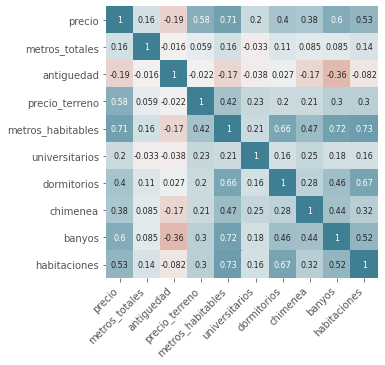

In [16]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

# ANOVA

In [ ]:
#Basado en: https://towardsdatascience.com/anova-test-with-python-cfbf4013328b

# ANOVA de un a vía
Es una prueba donde existen dos grupos de interés identificados mediante un factor. Por ejemplo, sea μ el verdadero promedio de salario anual para los egresados de licenciatura.
Factore de interés único = Sujetos del estudio
Asumimos que tenemos 6 categorías de sujetos de estudio

La idea principal detrás del ANOVA de una vía es tomar muestras aleatorias independientes de cada grupo. Luego, calcular las medias simples para cada grupo. Luego, comparar la variación de las medias muestrales, entre los grupos contra la variación dentro delos grupos. Finalmente, tomar una decisión con base en un estadístico de prueba para ver si las medias de los grupos son iguales o no.

## Sumas de cuadrados
Dentro de la tabla ANOVA de una vía:
Cantidad total de variabilidad que viene de dos posibles fuentes, digamos:
1. La diferencia entre grupos, llamada de tratamiento (TR)
2. La diferencia dentro de los grupos, llamada error (E)
La suma de los cuadrados debidos al tratamiento (SSRT) y la suma de los cuadrados debidos al error (SSE) se despliegan en la tabla ANOVA de una vía. La suma de SSRT y SSE es igual a la suma total de cuadrados (SSTO).
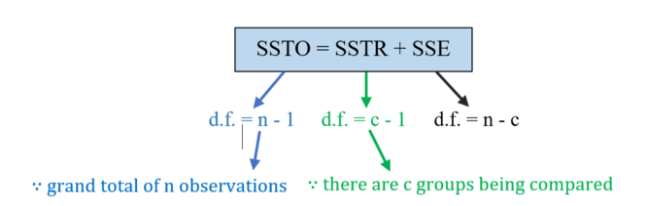

Observe que los grdos de libertad de la SSTO es igual a la suma de los grados de libertad de SSTR y SSE

# Datos

In [29]:
import pandas as pd
import random

# read original dataset
student_df = pd.read_csv('students.csv')

# filter the students who are graduated
graduated_student_df = student_df[student_df['graduated'] == 1]

# random sample for 500 students 
unique_student_id = list(graduated_student_df['stud.id'].unique())
random.seed(30) # set a seed so that everytime we will extract same sample
sample_student_id = random.sample(unique_student_id, 500)
sample_df = graduated_student_df[graduated_student_df['stud.id'].isin(sample_student_id)].reset_index(drop=True)

# two variables of interest
sample_df = sample_df[['major', 'salary']]
groups = sample_df.groupby('major').count().reset_index()
# groups.plot(kind='bar',x='major',y='salary')
groups

,major,salary
0,Biology,87
1,Economics and Finance,94
2,Environmental Sciences,97
3,Mathematics and Statistics,75
4,Political Science,84
5,Social Sciences,63


### Supuesto de Normalidad

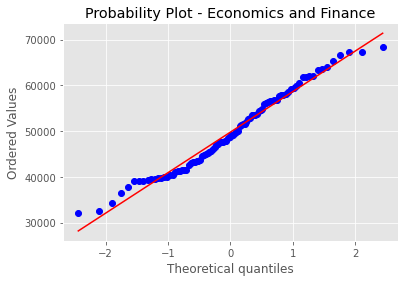

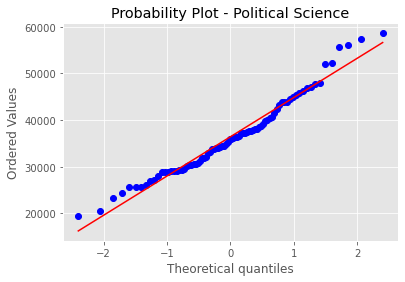

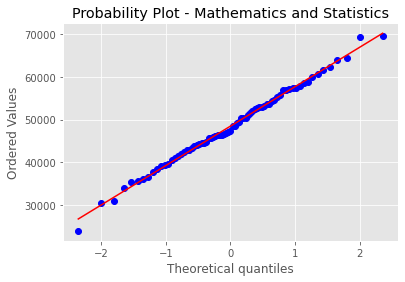

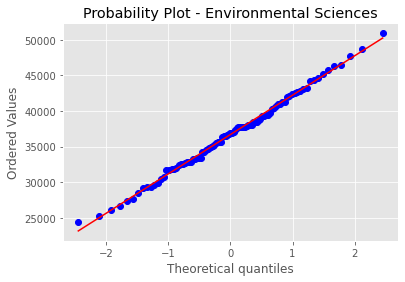

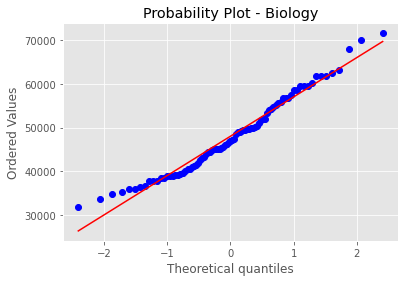

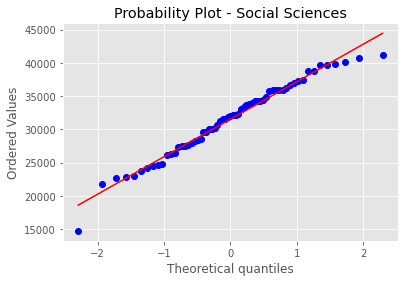

In [30]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

unique_majors = sample_df['major'].unique()
for major in unique_majors:
    stats.probplot(sample_df[sample_df['major'] == major]['salary'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  major)
    plt.show()

### Supuesto de homogeneidad de la varianza

In [31]:
# calculate ratio of the largest to the smallest sample standard deviation
n1=sample_df.groupby('major').std().max()
d1=sample_df.groupby('major').std().min()
ratio = n1 / d1
ratio

salary    1.669921
dtype: float64

El umbral para este valor es 2, por lo tanto podemos considerar plausible el supuesto de homogeneidad
de varianza

In [32]:
#Desviaciones estándar
sample_df.groupby('major').std()

,salary
major,
Biology,8969.128626
Economics and Finance,8805.411737
Environmental Sciences,5446.382739
Mathematics and Statistics,9095.029541
Political Science,8386.935024
Social Sciences,5581.030266


In [33]:
### Tabla ANOVA

In [34]:
d1

salary    5446.382739
dtype: float64

In [35]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = sample_df['salary'].mean()
SSTR = sample_df.groupby('major').count() * (sample_df.groupby('major').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['salary'].sum()

# calculate SSE and update anova table
SSE = (sample_df.groupby('major').count() - 1) * sample_df.groupby('major').std()**2
anova_table['SS']['Within Groups'] = SSE['salary'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['salary'].sum() + SSE['salary'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = sample_df['major'].nunique() - 1
anova_table['df']['Within Groups'] = sample_df.shape[0] - sample_df['major'].nunique()
anova_table['df']['Total'] = sample_df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,24184075535.074104,5,4836815107.014821,77.408037,0.0,2.592178
Within Groups,30867423591.219269,494,62484663.14012,,,
Total,55051499126.293373,499,110323645.543674,,,


In [36]:
# The p-value approach
print("Enfoque 1: El enfoque del p-valor para la prueba de hipótlesis en la regla de decisión")
conclusion = "NO se pudo rechazar la hiótesis Nula."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

Enfoque 1: El enfoque del p-valor para la prueba de hipótlesis en la regla de decisión
F-score is: 77.40803685167364  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 77.40803685167364  and critical value is: 2.592178494905
Null Hypothesis is rejected.


* Ejercicio: ¿Qué gráficos podríamos agregar para visualizar los resultados observados?

In [37]:
#Ejemplo tomado de: https://www.reneshbedre.com/blog/anova.html

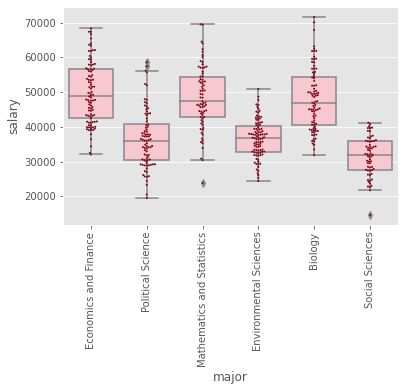

In [40]:
# reshape the d dataframe suitable for statsmodels package 
#df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# replace column names
#df_melt.columns = ['index', 'treatments', 'value']

# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='major', y='salary', data=sample_df, color='pink')
ax = sns.swarmplot(x="major", y="salary", data=sample_df, color='#7d0013',size=2)
plt.xticks(rotation=90)
plt.show()

In [11]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
#fvalue, pvalue = stats.f_oneway(sample_df['A'], df['B'], df['C'], df['D'])
#print(fvalue, pvalue)
# 17.492810457516338 2.639241146210922e-05

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('salary ~ C(major)', data=sample_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
#from bioinfokit.analys import stat
#res = stat()
#res.anova_stat(df=sample_df, res_var='salary', anova_model='salary ~ C(major)')
#res.anova_summary


,sum_sq,df,F,PR(>F)
C(major),2.418408e+10,5.0,77.408037,7.461055e-60
Residual,3.086742e+10,494.0,NaN,NaN
